In [1]:
import sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker
sys.path.append('../pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')
import analysis as an

Behroozi+18 not loaded


In [3]:
simnames = [x.split('/')[-1] for x in glob.glob('../../data/vc*')]

In [4]:
sims = []
for simname in simnames:
    vc = float(simname.split('_')[0][2:])
    PL_potential = l.PowerLawPotential(m=0.,vc_Rvir=vc*un.km/un.s,Rvir=200*un.kpc)
    Rcirc = float(simname.split('_')[3][5:])
    simdir = '../../data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,
                   dynamicCentering=True,recalc=False,Nsnapshots=None,
                   origin=np.zeros(3),Rcirc = Rcirc*un.kpc,
                   analyticGravity=PL_potential)
    print(sim.galaxyname, sim.Nsnapshots())
    sims.append(sim)

loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot110_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot535_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot841_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs0_Mdot3859_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot7470_Rcirc1 263
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb_mag 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0,

In [70]:
reload(an)
sims = sorted(sims,key=an.parsename)
timeseriesDic = dict([(sim,an.timeSeries_additions(sim)) for sim in sims])

In [60]:
labels = ['vc', 'Rsonic', 'log Mdot', 'Rcirc']
possible_values = [(100,150),(0,3,30),(-1,-0.5,0,0.5,1),(1,10)]
groupdics = [dict([(v,dict(color=cmap(1-iv/(len(possible_values[i])-1)),
                             label='%s=%.1f'%(labels[i],v))) for iv,v in enumerate(possible_values[i])])
             for i in range(4)]
groupfuncs = [(lambda sim,i=i: an.parsename(sim)[i],
               lambda sim:     u.iround(log(an.parsename(sim)[2])-3,0.5))[i==2]
              for i in range(4)]

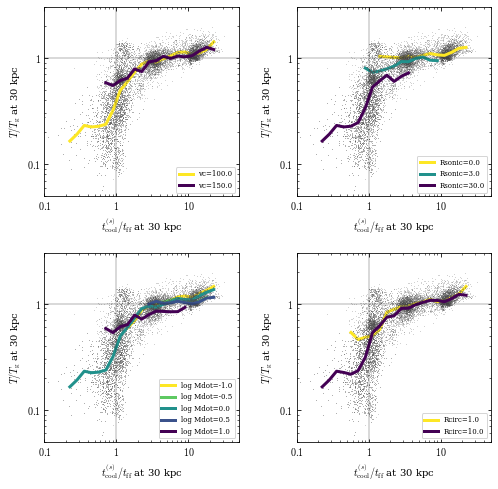

In [52]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic, 'tcools','tffs','Ts','Tcs',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax)
pl.savefig(l.figdir+'ICV.pdf')

* how is turbulence calculated? add turbulence to all sims (incoherence may be crucial for disk destruction)
* add tcool << tff sims
* need gas studio to make movies

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


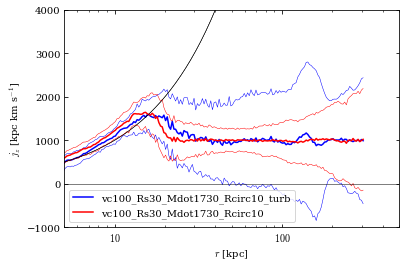

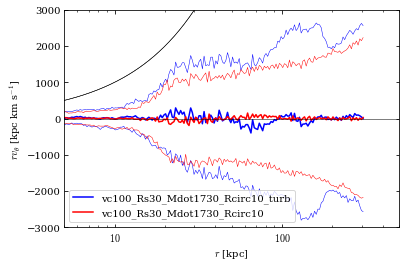

In [48]:
for v_str in 'v_phi','v_theta':
    pl.figure()
    ax=pl.subplot(111)
    for sim in sims:
        vc = an.parsename(sim)[0]
        if '_'.join(str(sim).split('_')[:4])!='vc100_Rs30_Mdot1730_Rcirc10': continue
        if 'mag' in str(sim): continue
        iSnapshot = 100
        prof = sim.getProfiler(iSnapshot)
        rs = prof.rs_midbins()
        v_phi = prof.profile1D(v_str, 'MW',power=1)
        v_phi2 = prof.profile1D(v_str, 'MW',power=2)
        sigma = (v_phi2-v_phi**2)**0.5        
        for j in -1,0,1:
            pl.plot(rs, rs*(v_phi+j*sigma),c='rb'['turb' in str(sim)],lw=(0.5,1.5)[j==0],label=('_',sim)[j==0])
        pl.plot(rs,rs*vc,c='k',lw=0.5)
    pl.semilogx()
    pl.legend()        
    pl.xlim(5,500)
    pl.xlabel(r'$r$ [kpc]')
    pl.axhline(0,c='k',lw=0.5)
    
    ax.xaxis.set_major_formatter(u.arilogformatter)    
    if v_str=='v_phi':
        pl.ylabel(r'$j_z$ [kpc km s$^{-1}$]')
        pl.ylim(-1000,4000)
    else:
        pl.ylabel(r'$r v_\theta$ [kpc km s$^{-1}$]')
        pl.ylim(-3000,3000)       
    pl.savefig(l.figdir+'coherence_%s.pdf'%v_str)

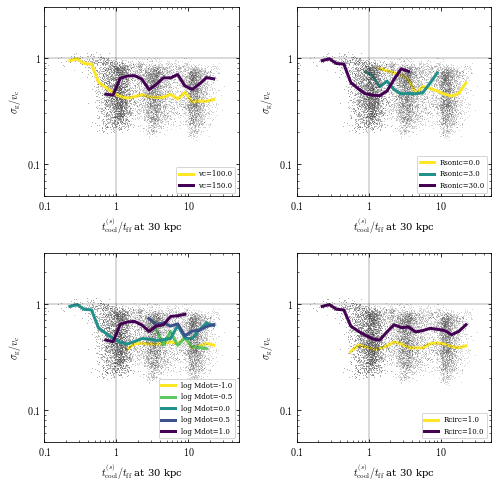

In [53]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'tcools','tffs','sigmas','vcs',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax)
pl.savefig(l.figdir+'sigma_gas.pdf')

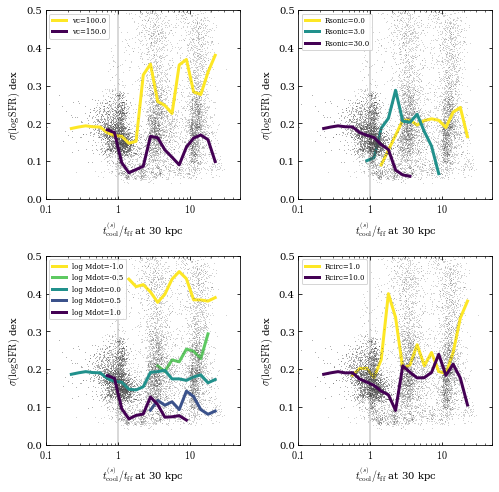

In [54]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'tcools','tffs','logSFRs_std','ones',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax,isLog=False)
pl.savefig(l.figdir+'burstiness.pdf')

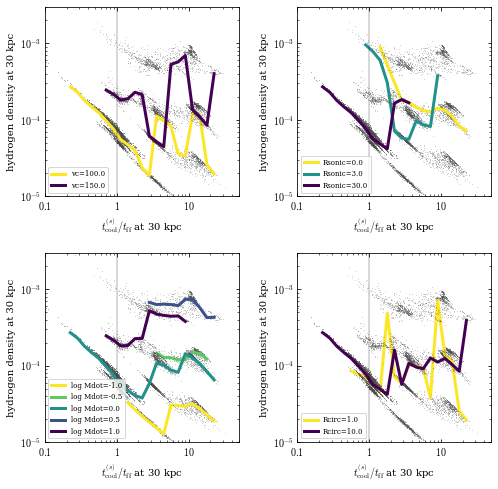

In [55]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'tcools','tffs','nHs','ones',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax)
pl.savefig(l.figdir+'particle_density.pdf')

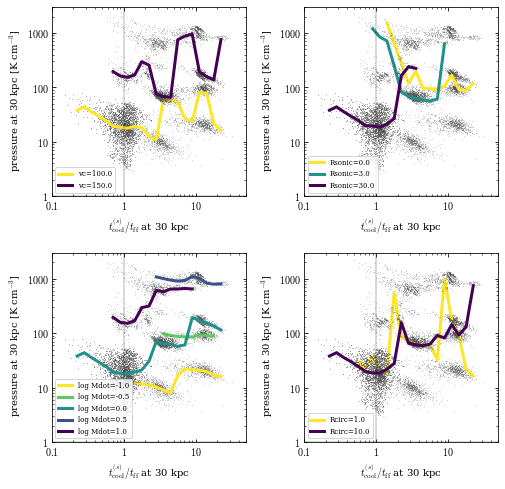

In [71]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'tcools','tffs','P2ks','ones',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax)
pl.savefig(l.figdir+'pressure.pdf')

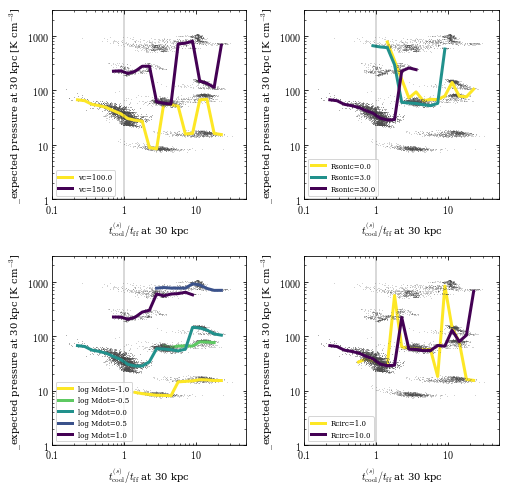

In [72]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'tcools','tffs','P2ks_expected','ones',
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax)
pl.savefig(l.figdir+'pressure_expected.pdf')

In [ ]:
reload(an)
fig = pl.figure(figsize=(8,8)); pl.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(4):
    ax = pl.subplot(2,2,i+1)
    an.ratio_comparison_group_plot(sims,timeseriesDic,'P2ks','ones','logSFRs_std','ones',
                                   bins = 10.**np.arange(0,3,.2),
                                groupfunc = groupfuncs[i],groupdic=groupdics[i],ax=ax,isLog=False)
pl.savefig(l.figdir+'burstiness_vs_pressure.pdf')

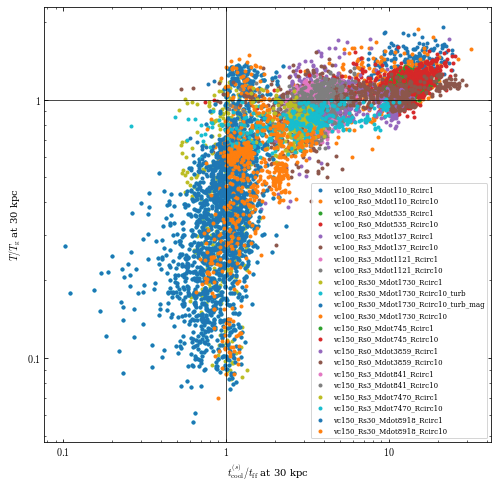

In [8]:
reload(an)
an.ratio_comparison_scatter_plot(sims,'tcools','tffs','Ts','Tcs')
pl.savefig(l.figdir+'ICV.pdf')

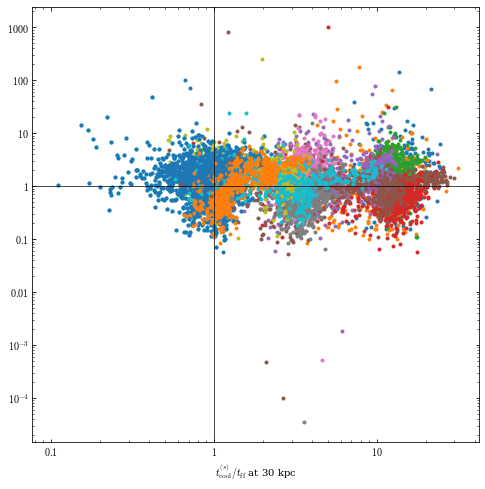

In [58]:
reload(an)
an.ratio_comparison_scatter_plot(sims,'tcools','tffs','SFRs','Mdots')
# pl.savefig(l.figdir+'ICV.pdf')

../pysrc/analysis.py:40: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  pl.axhline(1.,c='k',lw=0.7)
../pysrc/analysis.py:40: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  pl.axhline(1.,c='k',lw=0.7)


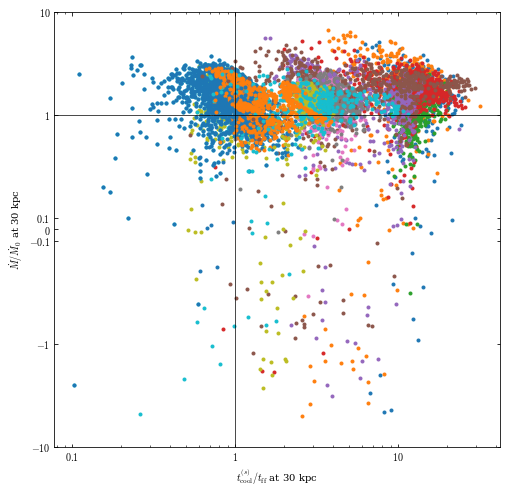

In [55]:
reload(an)
an.compare_to_initial_Mdot(sims,'tcools','tffs')
pl.savefig(l.figdir+'Mdot.pdf')

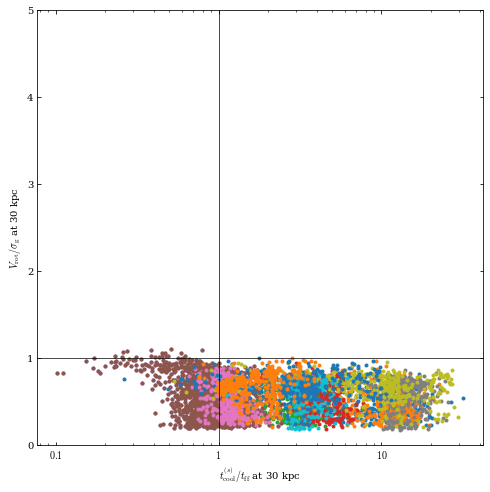

In [61]:
pl.figure(figsize=(8,8))
ax=pl.subplot(111)

for sim in sims:
    vc, Rsonic, Mdot, Rcirc = parsename(sim)
    if Rcirc!=10: continue
    f = np.load(l.profiledir + 'timeSeries_%s.npz'%sim)
    timeSeries = (f['times'],f['SFRs'],f['SFRmeans'],f['Mdots'], f['Vrots'], f['sigmas'], 
                      f['vcs'], f['tcools'], f['tffs'], f['nHs'], f['Zs'], f['vcRcircs'], 
                      f['Ts'],f['Tcs'])
    (times, SFRs, SFRs_means, Mdots, Vrots, sigmas, vcs, tcools, 
         tffs, nHs, Zs, vcRcircs, Ts, Tcs) = timeSeries
    inds = times>1
    pl.plot(tcools[inds]/tffs[inds], sigmas[inds]/vcs[inds],'.',label=sim)
pl.semilogx()
pl.axhline(1.,c='k',lw=0.7)
pl.axvline(1.,c='k',lw=0.7)
pl.ylabel(r'$V_{\rm rot}/\sigma_{\rm g}$ at 30 kpc')
pl.ylim(0,5)
pl.xlabel(r'$t_{\rm cool}^{(s)}/t_{\rm ff}$ at 30 kpc')
ax.xaxis.set_major_formatter(l.u.arilogformatter)
# pl.legend(fontsize=7,ncol=1,loc='lower right')
pl.savefig(l.figdir+'v_ratio.pdf')

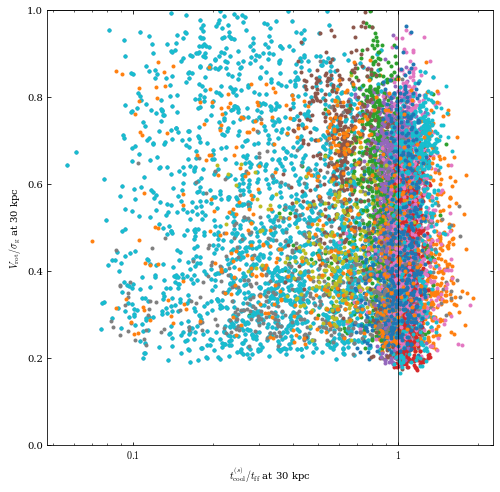

In [42]:
pl.figure(figsize=(8,8))
ax=pl.subplot(111)

for sim in sims:
    f = np.load(l.profiledir + 'timeSeries_%s.npz'%sim)
    timeSeries = (f['times'],f['SFRs'],f['SFRmeans'],f['Mdots'], f['Vrots'], f['sigmas'], 
                      f['vcs'], f['tcools'], f['tffs'], f['nHs'], f['Zs'], f['vcRcircs'], 
                      f['Ts'],f['Tcs'])
    (times, SFRs, SFRs_means, Mdots, Vrots, sigmas, vcs, tcools, 
         tffs, nHs, Zs, vcRcircs, Ts, Tcs) = timeSeries
    inds = times>1
    pl.plot((Ts/Tcs)[inds], (sigmas/vcs)[inds],'.',label=sim)
pl.semilogx()
pl.axhline(1.,c='k',lw=0.7)
pl.axvline(1.,c='k',lw=0.7)
pl.ylabel(r'$V_{\rm rot}/\sigma_{\rm g}$ at 30 kpc')
pl.ylim(0,1)
pl.xlabel(r'$t_{\rm cool}^{(s)}/t_{\rm ff}$ at 30 kpc')
ax.xaxis.set_major_formatter(l.u.arilogformatter)
# pl.legend(fontsize=7,ncol=1,loc='lower right')
pl.savefig(l.figdir+'v_ratio.pdf')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by z

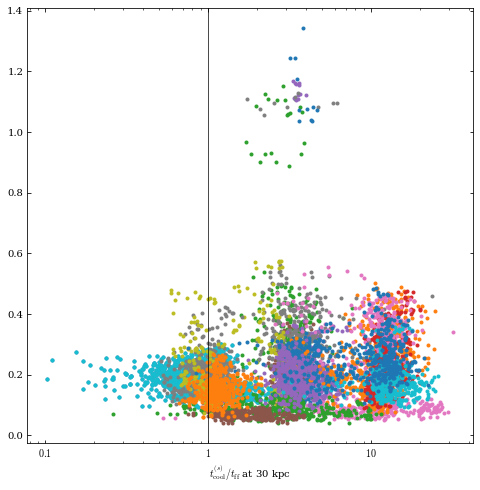

In [36]:
pl.figure(figsize=(8,8))
ax=pl.subplot(111)

for sim in sims:
    f = np.load(l.profiledir + 'timeSeries_%s.npz'%sim)
    timeSeries = (f['times'],f['SFRs'],f['SFRmeans'],f['Mdots'], f['Vrots'], f['sigmas'], 
                      f['vcs'], f['tcools'], f['tffs'], f['nHs'], f['Zs'], f['vcRcircs'], 
                      f['Ts'],f['Tcs'])
    (times, SFRs, SFRs_means, Mdots, Vrots, sigmas, vcs, tcools, 
         tffs, nHs, Zs, vcRcircs, Ts, Tcs) = timeSeries
    window = 0.3 #Gyr
    SFRs_means = np.zeros(times.shape[0])
    logSFRs_std= np.zeros(times.shape[0])
    for it,t in enumerate(times):
        inds = (times<t+window/2.) & (times > t-window/2.)
        SFRs_means[it]   = SFRs[inds].mean()
        logSFRs_std[it] = log(SFRs[inds]).std()    
    pl.plot(tcools/tffs, logSFRs_std,'.',label=sim)
pl.semilogx()
pl.axvline(1.,c='k',lw=0.7)
# pl.ylabel(r'$V_{\rm rot}/\sigma_{\rm g}$ at 30 kpc')
# pl.ylim(0,5)
pl.xlabel(r'$t_{\rm cool}^{(s)}/t_{\rm ff}$ at 30 kpc')
ax.xaxis.set_major_formatter(l.u.arilogformatter)
# pl.legend(fontsize=7,ncol=1,loc='lower right')
pl.savefig(l.figdir+'burstiness.pdf')